In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime


pd.set_option('max_colwidth', 140)

In [2]:
!pwd

/Users/JenD/W266/FinalProject/RealRelevantReviews


In [3]:
!head -1 ../small_train.json

{"reviewerID": "A3GUK4RWXKHS9I", "asin": "0002007770", "reviewerName": "Barbara McArthur \"writer/editor\"", "helpful": [1, 1], "reviewText": "After \"Riding Lessons\", which I loved - and \"Flying Changes\", which was a huge disappointment to me, I was not sure what I would find in \"Water for Elephants\".  Wow - what a great read!  Research does pay off hugely - when it enables a writer to place the reader inside another world so easily - the world of the circus. This was a world totally foreign to most of us - but now, so familiar, thanks to Sara.  This book satisfied my three requirements - transportation (take me away from all this),  levitation (lift my spirits and leave me thinking good thoughts) and infiltration (let me get inside the characters so I feel I really know them). Reading \"Water for Elephants\" is time well-spent.  I'm happy to know Sara is working on a fourth book. I'll be first in line to buy it.", "overall": 5.0, "summary": "All I hoped for...and more!", "unixRe

In [4]:
dataset = '../small_train.json'

In [5]:
# load up the data
df = pd.read_json(dataset,lines=True)

In [6]:
print("Shape of the datafile: {} rows by {} columns".format(df.shape[0],df.shape[1]))

Shape of the datafile: 37722 rows by 9 columns


In [8]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0002007770,"[1, 1]",5,"After ""Riding Lessons"", which I loved - and ""Flying Changes"", which was a huge disappointment to me, I was not sure what I would find in...","11 11, 2006",A3GUK4RWXKHS9I,"Barbara McArthur ""writer/editor""",All I hoped for...and more!,1163203200
1,0002007770,"[3, 4]",5,"Page after page this novel is filled with interesting facts, experiences and history. That it's a memoir of a patient/resident of a nurs...","11 3, 2006",A4MSAOOL01JMG,Bruce Burns,Fabulous Book,1162512000
2,0002007770,"[1, 1]",5,A lovely easy book to read. Good story. Makes one think about how we treat our elderly and would we want to be set aside like this. Like...,"01 16, 2013",AJKBVGR25R4OF,helen d,Good read,1358294400
3,0002007770,"[1, 1]",5,Jacob Jankowski recounts the wonderful time he spent with the Benzini Brothers Most Spectacular Show on Earth. During the Great Depressi...,"07 16, 2010",A1UFV4HALV2OXW,"Indian Prairie Public Library ""ippl.info""",Wonderful story.,1279238400
4,0002007770,"[2, 3]",5,One of those books that I didn't want to end. The first chapters pull you in quickly. The history of the circus is absolutely fabulous...,"01 12, 2008",A3BD8IG1DRRY55,"Janet Lillian ""janlil""","Fabulous read, compelling story",1200096000


In [7]:
df['helpful_votes'] = df.apply(lambda x: x.helpful[0],axis=1)
df['unhelpful_votes'] = df.apply(lambda x: x.helpful[1],axis=1)
df.reviewTime = pd.to_datetime(df.reviewTime,infer_datetime_format=True)
df.sort_values(by=['reviewTime'],inplace=True,ascending=True)
first_rvw = df.reviewTime.min()
last_rvw = df.reviewTime.max()
df['review_age_days'] = df.apply(lambda x: (last_rvw - x.reviewTime).days,axis = 1)
print("This file's oldest and youngest reviews were published {} and {}".\
      format(first_rvw,last_rvw))
print("At snapshot date: oldest review was {} days old & youngest was {} days old.".\
      format(df.review_age_days.max(),\
            df.review_age_days.min()))

This file's oldest and youngest reviews were published 1997-08-20 00:00:00 and 2014-07-23 00:00:00
At snapshot date: oldest review was 6181 days old & youngest was 0 days old.


In [14]:
print("{:.2%} of our small training set of reviews have more unhelpful votes than helpful votes".\
      format(df[(df.helpful_votes == 0) & (df.unhelpful_votes > 0)].shape[0]/df.shape[0]))

11.34% of our small training set of reviews have more unhelpful votes than helpful votes


Text(0.5,1,'Helpful votes received by small_train reviews, by rating')

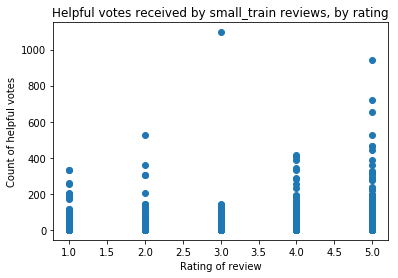

In [15]:
plt.scatter(x=df.overall,y=df.helpful_votes)
plt.ylabel("Count of helpful votes")
plt.xlabel("Rating of review")
plt.title("Helpful votes received by small_train reviews, by rating")

In [16]:
Total_helpful_reviews_in_dataset = np.sum(df.helpful_votes)
Total_unhelpful_reviews_in_dataset = np.sum(df.unhelpful_votes)
Total_votes_this_datasest = Total_helpful_reviews_in_dataset + Total_unhelpful_reviews_in_dataset
print("Of {} votes cast, {} were helpful votes and {} were unhelpful votes".\
     format(Total_votes_this_datasest,Total_helpful_reviews_in_dataset,\
            Total_unhelpful_reviews_in_dataset))
print("Helpful votes were thus {:.2%} of the total".format(Total_helpful_reviews_in_dataset/\
                                                          Total_votes_this_datasest))

Of 483607 votes cast, 204958 were helpful votes and 278649 were unhelpful votes
Helpful votes were thus 42.38% of the total


In [21]:
fivers = df[df.overall == 5.0].helpful_votes.quantile(np.arange(0,1,.05))
print("Number of reviews giving 5*s: {}".format(df[df.overall == 5.0].shape[0]))

Number of reviews giving 5*s: 19948


In [20]:
fours = df[df.overall == 4.0].helpful_votes.quantile(np.arange(0,1,.05))
print("Number of reviews giving 4*s: {}".format(fours.shape[0]))

Number of reviews giving 4*s: 20


In [23]:
a = {}
for i in range(1,6):
    a[i] = df[df.overall == float(i)].helpful_votes.quantile(np.arange(0,1,.05))
    print("{}* reviews number {} in total".format(i,df[df.overall == float(i)].shape[0]))

1* reviews number 2273 in total
2* reviews number 2525 in total
3* reviews number 4473 in total
4* reviews number 8503 in total
5* reviews number 19948 in total


1* reviews number 2273 in total
2* reviews number 2525 in total
3* reviews number 4473 in total
4* reviews number 8503 in total
5* reviews number 19948 in total


Text(0.5,0,'Portion of reviews receiving fewer than that number of votes')

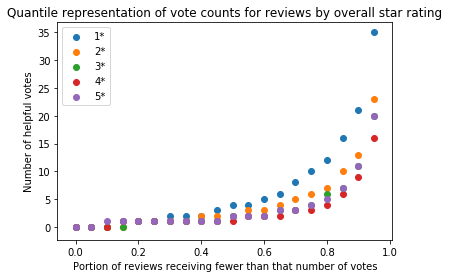

In [29]:
a = {}
for i in range(1,6):
    a[i] = df[df.overall == float(i)].helpful_votes.quantile(np.arange(0,1,.05))
    a[i].rename(str(i) + '*',inplace=True)
    print("{}* reviews number {} in total".format(i,df[df.overall == float(i)].shape[0]))
    plt.scatter(x=a[i].index,y=a[i])
plt.legend()
plt.title("Quantile representation of vote counts for reviews by overall star rating")
plt.ylabel("Number of helpful votes")
plt.xlabel("Portion of reviews receiving fewer than that number of votes")

Text(0,0.5,'Review age in days')

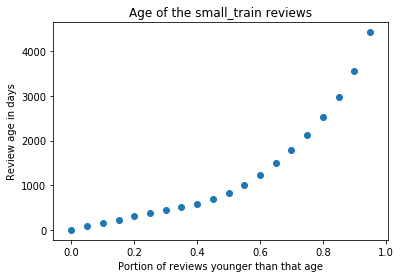

In [42]:
plt.scatter(x = np.arange(0,1,.05), y = df.review_age_days.quantile(np.arange(0,1,.05)))
plt.title("Age of the small_train reviews")
plt.xlabel("Portion of reviews younger than that age")
plt.ylabel("Review age in days")

In [37]:
df[df.review_age_days == 0]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,unhelpful_votes,review_age_days
19742,B00K2GAUC0,"[1, 1]",5,"I love this book, I didn't want to put it down I would be on the edge of my seat and was hoping it would have a happy ending and it did!!",2014-07-23,A1UWFP2JM5TOVN,"Yvonne L. Martin ""Yvonne""",Awesome Book,1406073600,1,1,0


In [9]:
# We must drop any review 0 days old in order to divide helpful vote count by age in days
df = df[df.review_age_days != 0]

In [10]:
# Define HVAR helpful vote arrival rate in YEARLY terms
df['HVAR'] = df.apply(lambda x: 365*x.helpful_votes/x.review_age_days,axis = 1)


/anaconda3/envs/w266fp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df.HVAR.quantile(np.arange(0,1,.05))

0.00    0.000000
0.05    0.000000
0.10    0.000000
0.15    0.157429
0.20    0.239501
0.25    0.332423
0.30    0.422128
0.35    0.523673
0.40    0.628227
0.45    0.730000
0.50    0.854801
0.55    1.013889
0.60    1.201976
0.65    1.430438
0.70    1.752000
0.75    2.147059
0.80    2.744361
0.85    3.681556
0.90    5.488722
0.95    9.931973
Name: HVAR, dtype: float64

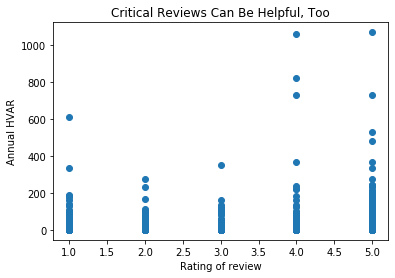

In [11]:
plt.scatter(x=df.overall,y=df.HVAR)
plt.ylabel("Annual HVAR")
plt.xlabel("Rating of review")
plt.title("Critical Reviews Can Be Helpful, Too")
plt.savefig("Annual_HVAR_by_rating_37K_rsample.png")

In [ ]:
# TODOs:
# How many reviews have at least 3 votes? 4? At least one positive vote?
# How do we incorporate the "subject" of the review? Segment/sentence 1?
# Will we need to embed the individual books in order to train our model? 
# Do we have enough data to do that?
# What would it take to scrape genre data from Amazon?